# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [1]:
# Resolver acá

import requests

# Así se ve la búsqueda en el navegador:
# https://listado.mercadolibre.com.ar/cuadros-decorativos#D[A:cuadros%20decorativos]

buscar = "cuadros decorativos"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) 

# Vemos el texto
response.text



<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"cuadros decorativos","paging":{"total":253360,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA1155423977","title":"Cuadro Calado Monumentos Eiffel Libertad Pisa Big Ben Set X4","condition":"new","thumbnail_id":"992508-MLA51221012094_082022","catalog_product_id":null,"listing_type_id":"gold_special","sanitized_title":"cuadro-calado-monumentos-eiffel-libertad-pisa-big-ben-set-x4","permalink":"https://articulo.mercadolibre.com.ar/MLA-1155423977-cuadro-calado-monumentos-eiffel-libertad-pisa-big-ben-set-x4-_JM","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA1635","domain_id":"MLA-DECORATIVE_PAINTINGS","thumbnail":"http://http2.mlstatic.com/D_992508-MLA51221012094_082022-I.jpg","currency_id":"ARS","order_backend":1,"price":18899.37,"original_price":29999,"sale_price":{"price_id":"","amount":18899.37,"conditions":{"eligible":true,"context_restrictions":["channel_marketplace"],"start_time":"2024

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [4]:
# Resolver acá

# guardamos en un diccionario (json)
data_cuadros = response.json()

import pandas as pd  

# guardo titulo y precio en una lista
productos = []
for item in data_cuadros['results']:
    productos.append({'Producto': item['title'], 'Precio': item['price']})

# Creo dataframe
df_precios = pd.DataFrame(productos)

print(df_precios)

                                             Producto    Precio
0   Cuadro Calado Monumentos Eiffel Libertad Pisa ...  18899.37
1   Cuadro Triptico Calado Madera Moderno Decoraci...  15199.05
2   Cuadro Madera Calado Mdf 5 Hojas Moderno Livin...  16999.15
3   Cuadro De Madera Calado Mdf Hojas Moderno Livi...  12879.08
4   Cuadro De Madera Calado Mdf Hojas Moderno Livi...  12879.08
5   Cuadro Decorativo Nueva York 110x55cm Moderno ...  22998.00
6   Cuadro De Madera Calado Mdf Cafe Moderno Livin...  14249.05
7   Cuadro Pintura Patagonia Cabaña Bosque Muelle ...  21224.25
8   Cuadro Artesanal Triptico Hojas Circulos Calad...   9993.00
9   Cuadros Calado Triptico Decorativo Moderno Arb...  28806.83
10  Set X6 Cuadros Viajes Europa Turismo Blanco Y ...  26249.25
11  Cuadro Dolar Scarface Al Pacino Tony Montana B...  21224.25
12  Cuadro Arbol De La Vida Color 4 Estaciones Año...  19949.25
13  Cuadro Madera Calado Circulos Degrade Deco Mod...  14959.12
14  Cuadro Madera Calado Carpe Frases Mo

In [11]:
#guardo los valores en variables
mean_precio = df_precios['Precio'].mean()
max_precio = df_precios['Precio'].max()
min_precio = df_precios['Precio'].min()

#imprimo los resultados redondeados
print("Media de precios: ", round(mean_precio))
print("Precio máximo: ", round(max_precio))
print("Precio mínimo: ", round(min_precio))

Media de precios:  21106
Precio máximo:  48900
Precio mínimo:  9993


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

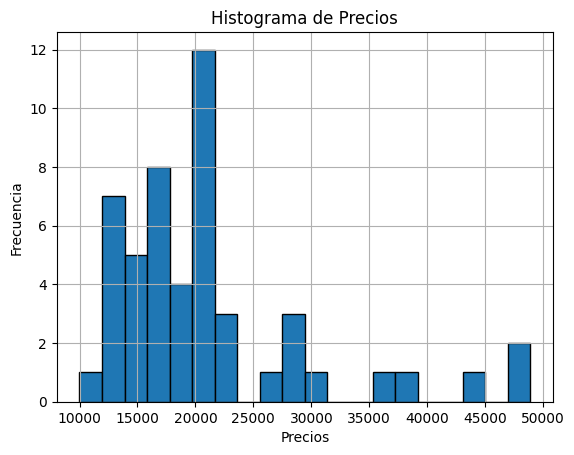

In [17]:
# Resolver acá

import matplotlib.pyplot as plt

# histograma de precios
df_precios['Precio'].hist(bins=30, edgecolor='black')

# etiquetas
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

# Mostrar el gráfico
plt.show()

Podemos ver que los precios se concentran entre los $10000 y los $24000, después están mas dispersos. Podríamos decir que los cuadros a partir de los $35000 son outliers. 

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [35]:
# Resolver acá

#vamos a buscar las carpas más y menos vendidas y después comparar la cantidad de cuotas que tienen

buscar = "carpas"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Indico los parámetros a buscar
param = {'search': buscar, 'sort': 'más vendidos', 'limit': 25}

# Hacemos el pedido o request y obtenemos la response
response = requests.get(url, params= param)
print(response) 

# Vemos el texto
response.text

# guardamos en un diccionario (json)
carpas_mas_vendidas = response.json() 

# guardo titulo y precio en una lista
productos = []
for item in data_cuadros['results']:
    productos.append({'Producto': item['title'], 'Precio': item['price'], "Cuotas" : item["payment_method_type"]})

# Creo dataframe
df_precios = pd.DataFrame(productos)

print(df_precios)

<Response [200]>


KeyError: 'payment_method_type'

In [33]:
# Resolver acá

#vamos a buscar las carpas más y menos vendidas y después comparar la cantidad de cuotas que tienen

buscar = "carpas"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Indico los parámetros a buscar
param = {'search': buscar, 'sort': 'más vendidos', 'limit': 25}

# Hacemos el pedido o request y obtenemos la response
response = requests.get(url, params= param)
print(response) 

# Vemos el texto
response.text

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"carpas","paging":{"total":6150,"primary_results":1000,"offset":0,"limit":25},"results":[{"id":"MLA1523080726","title":"Carpa Para 2 Personas Liviana Camping Trekking - Klatter","condition":"new","thumbnail_id":"630998-MLU75828806222_042024","catalog_product_id":"MLA22711281","listing_type_id":"gold_pro","sanitized_title":"carpa-para-2-personas-liviana-camping-trekking-klatter","permalink":"https://www.mercadolibre.com.ar/carpa-para-2-personas-liviana-camping-trekking-klatter/p/MLA22711281#wid=MLA1523080726&sid=unknown","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA1363","domain_id":"MLA-TENTS","thumbnail":"http://http2.mlstatic.com/D_630998-MLU75828806222_042024-I.jpg","currency_id":"ARS","order_backend":1,"price":37190,"original_price":44990,"sale_price":{"price_id":"","amount":37190,"conditions":{"eligible":true,"context_restrictions":["channel_marketplace"],"start_time":"2024-09-07T03:00:00Z","end_time

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
